In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.environ["PYQULAROOT"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'coolwarm'

import numpy as np

# Moire electronic states
In this session we will address several examples highlighting the physics of moire systems

## Folded electronic structure of a 1D linear chain
We will start showing how the bands of a linear chain get folded when creating a supercell

([], [])

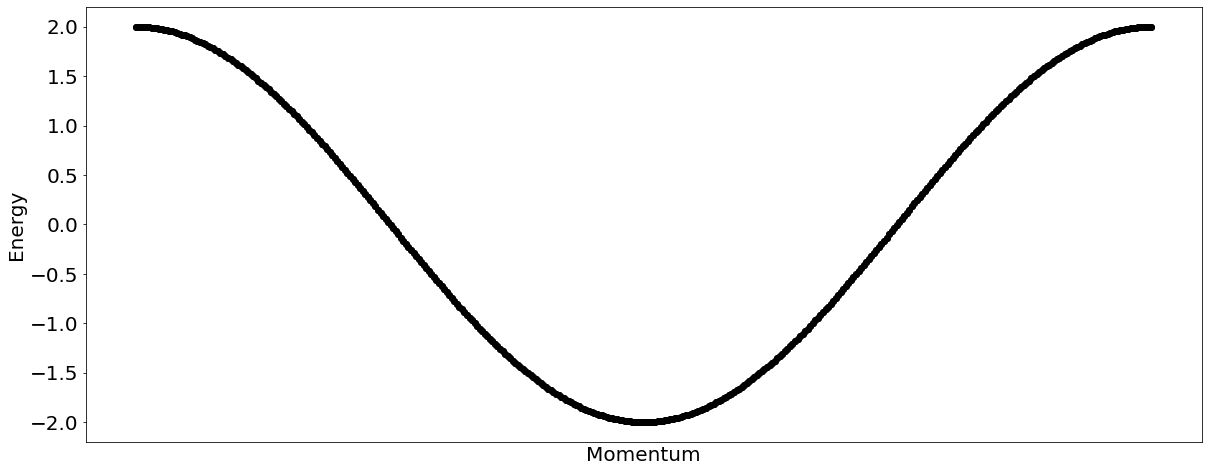

In [2]:
from pyqula import geometry
g = geometry.chain() # generate a chain
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

We now compute the band structure taking several atoms per unit cell

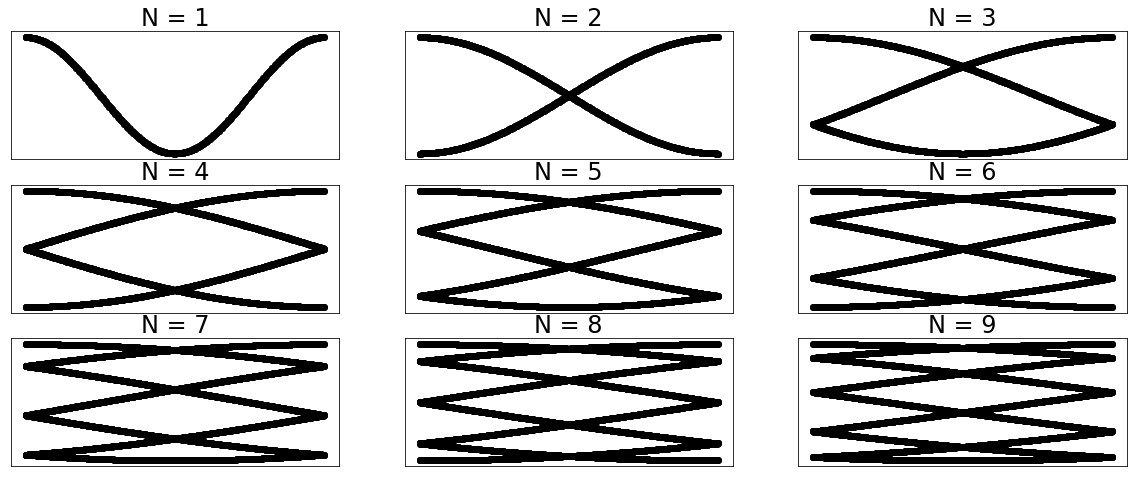

In [3]:
NS = 9 # maximum number of sites per unit cell
ii = 1 # counter for the subplots
for n in range(1,NS+1):
    g = geometry.chain() # generate a chain
    g = g.get_supercell(n) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (k,e) = h.get_bands() # compute band structure
    plt.subplot(NS//3,3,ii); ii += 1 
    plt.title("N = "+str(ii-1)) # set the title
    plt.scatter(k,e,c="black") ; plt.yticks([]) ; plt.xticks([]) ; plt.xticks([]) # plot

Let us now focus on a relatively big unit cell (N=10), and see what happens if we introduce a moire potential

Text(0, 0.5, ' y & onsite energy')

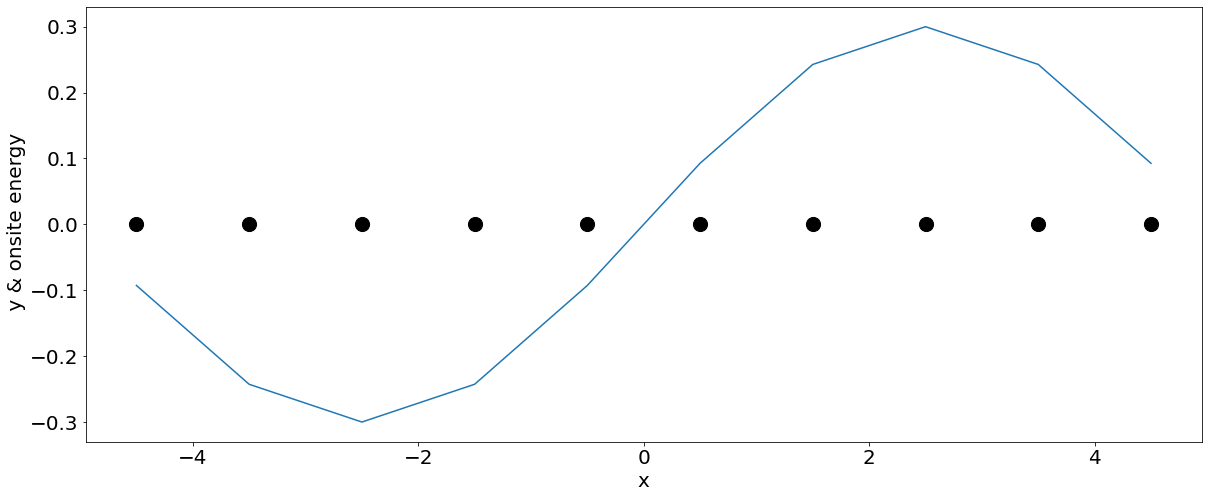

In [4]:
# first, let us just plot how a potential looks like
g = geometry.chain() # generate chain
N = 10 # size of the supercell
g = g.get_supercell(N) # generate a supercell with N sites
h = g.get_hamiltonian() # and generate the Hamiltonian

# let us define a potential that is commensurate with the lattice
fpot = lambda r: 0.3*np.sin(np.pi*2.*r[0]/N) # just a cosine potential

plt.scatter(g.r[:,0],g.r[:,1],c="black",s=200) # scatter the sites
plt.plot(g.r[:,0], [fpot(ri) for ri in g.r] ) # plot the potential
plt.xlabel("x") ; plt.ylabel(" y & onsite energy")

(-2.2, -1.0)

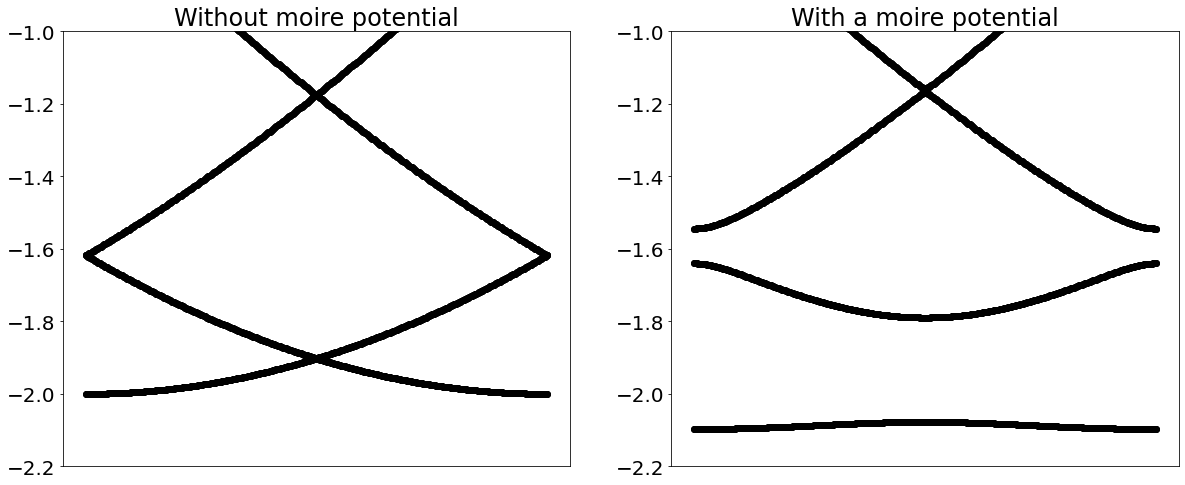

In [5]:
g = geometry.chain() # generate chain
N = 10 # size of the supercell
g = g.get_supercell(N) # generate a supercell with N sites
h = g.get_hamiltonian() # and generate the Hamiltonian

# let us define a potential that is commensurate with the lattice
fpot = lambda r: 0.3*np.sin(np.pi*2.*r[0]/N) # just a cosine potential

# as reference, plot the bands without the potential
plt.subplot(1,2,1)
plt.title("Without moire potential") # set the title
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xticks([]) ; plt.ylim([-2.2,-1]) # plot

# now add the potential and recompute the bands
plt.subplot(1,2,2)
plt.title("With a moire potential") # set the title
h.add_onsite(fpot) # and add an onsite modulation following this profile
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xticks([]) ; plt.ylim([-2.2,-1])# plot

### Exercise
- Estimate how strong has to be the perturbation to create a nearly flat moire band for N=10
- If you change the size of the unit cell (to N=20 for example), which value of the moire potential generates a flat band?

### Emergence of van Hove singularities due to the moire
As we switch on a moire potential, a set of van Hove singularities appear, stemming from the flattened bands created by the folding and anticrossing

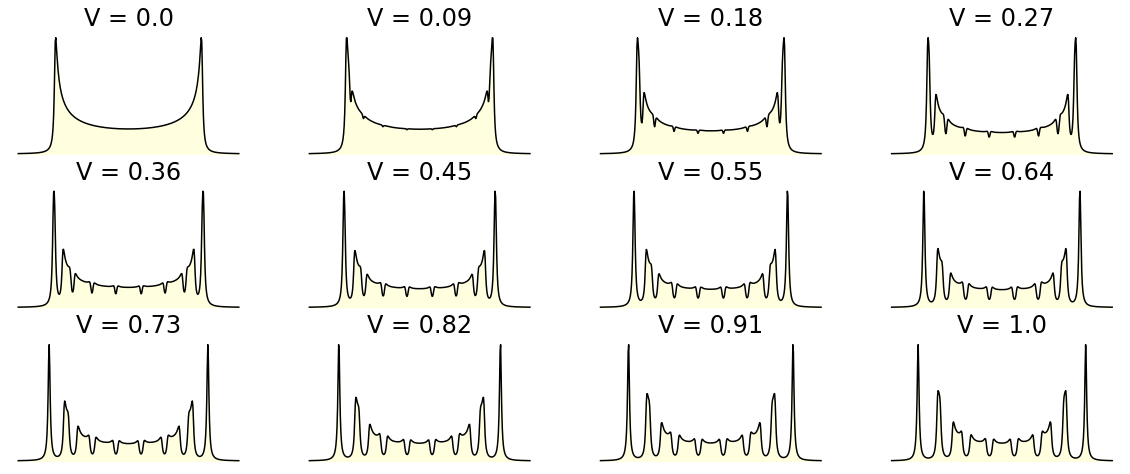

In [6]:
Nv = 12 ; Vs = np.linspace(0.,1.0,Nv) # potential strengths
N = 30 # size of the supercell
ii = 1 # counter for the subplots
for V in Vs:
    g = geometry.chain() # generate a chain
    g = g.get_supercell(n) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.add_onsite(lambda r: V*np.sin(np.pi*2.*r[0]/N)) # just a cosine potential
    (e,d) = h.get_dos(energies = np.linspace(-3.,3.,400),delta=3e-2) # compute DOS
    plt.subplot(Nv//4,4,ii); ii += 1 
    plt.title("V = "+str(np.round(V,2))) # set the title
    plt.plot(e,d,c="black") ; plt.axis("off") ; plt.xticks([]) # plot
    plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

## Electronic structure unfolding
Increasing the number of sites in the unit cell increases the number of bands. However, in certain cases we are interested in knowing how the moire bands are unfolded to the original Brillouin zone. This can be done using the unfolding operator as shown below for a supercell without a moire potential. Fat red dots depict the weight of the bands unfolded to the original Brillouin zone.

([], [])

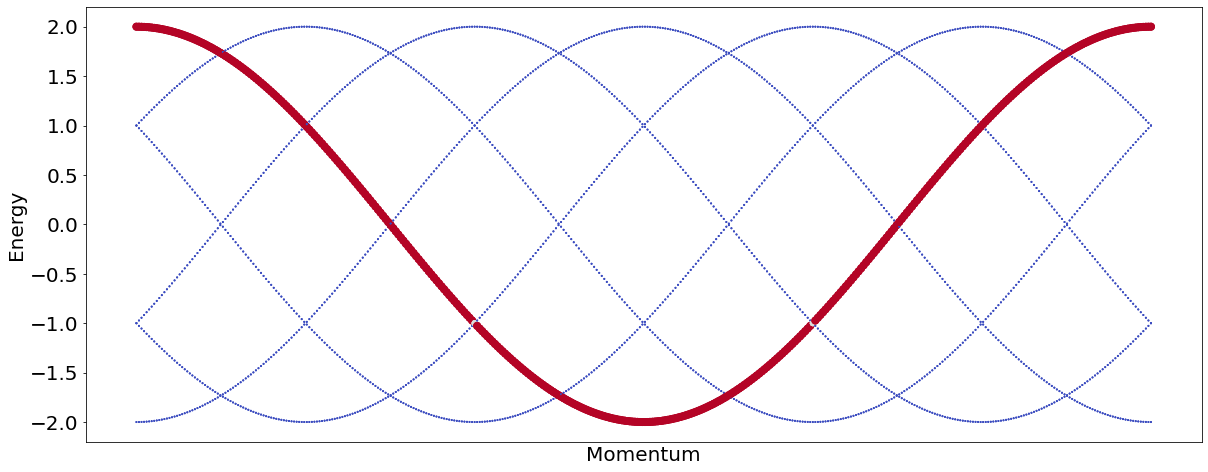

In [7]:
g = geometry.chain() # generate chain
N = 6 # size of the supercell
g = g.get_supercell(N,store_primal=True) # generate a supercell, store_primal is required for unfolding
h = g.get_hamiltonian() # and generate the Hamiltonian

# let us define a potential that is commensurate with the lattice
fpot = lambda r: 0.*np.sin(np.pi*2.*r[0]/N) # just a cosine potential (with zero amplitude)

h.add_onsite(fpot) # and add an onsite modulation following this profile
kpath = g.get_kpath()*N # compute in the original Brillouin zone, just by extending the reciprocal vectors
(k,e,c) = h.get_bands(operator="unfold",kpath=kpath) # compute band structure
plt.scatter(k,e,c=c,s=c*8+1) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Switch on the moire potential in the previous example, and show how the flat bands emerge from certain parts of the original Brillouin zone

## Moire electronic structure in 2D
We now move on to the case of 2D systems. We will see that in two-dimensions, flat bands and van Hove singularities also emerge due to a moire potenial.

### Moire bands in the triangular lattice
We will start by looking at how moire bands emerge in a triangular lattice

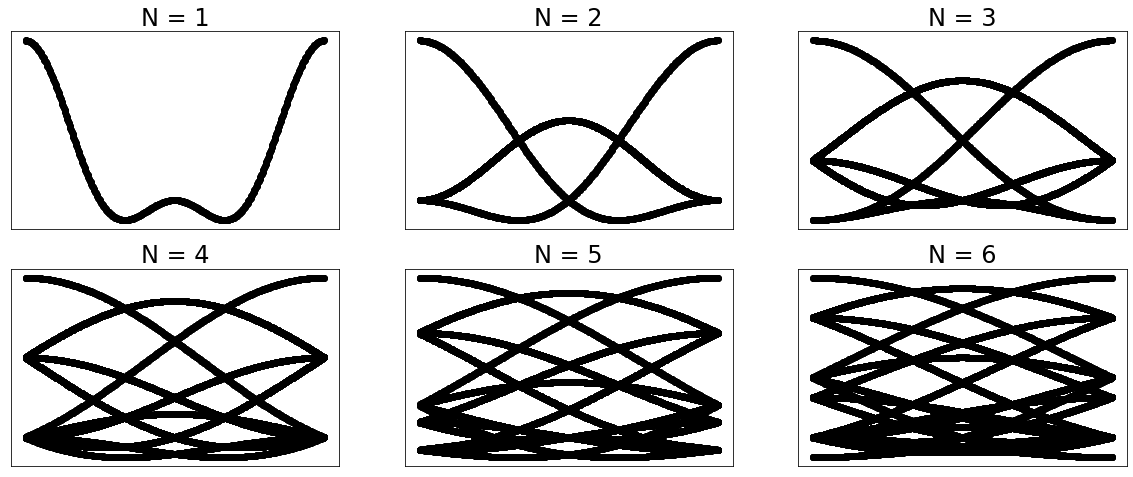

In [8]:
# Let us first look at how the bands are folded

NS = 6 # size of the supercell
ii = 1 # counter for the subplots
for n in range(1,NS+1):
    g = geometry.triangular_lattice() # generate a chain
    g = g.get_supercell((n,n)) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (k,e) = h.get_bands() # compute band structure
    plt.subplot(NS//3,3,ii); ii += 1 
    plt.title("N = "+str(ii-1)) # set the title
    plt.scatter(k,e,c="black") ; plt.yticks([]) ; plt.xticks([]) ; plt.xticks([]) # plot

### Exercise
- Show how the band folding is for a square and honeycomb lattices

(-48.67499999999999, 48.67499999999998, -28.10252435280503, 28.102524352805034)

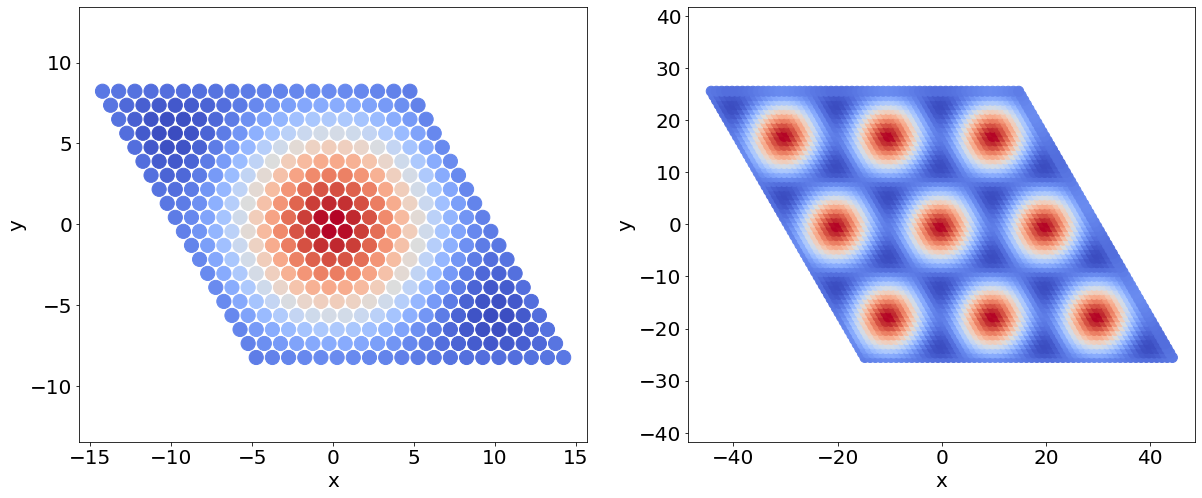

In [9]:
# let us now plot a commensurate potential in a supercell
# since writing a commensurate potential for 2D is harder, we will use the potentials library
from pyqula import potentials
N = 20 # size of the supercell
g = geometry.triangular_lattice() # generate a chain
g = g.get_supercell((N,N)) # generate a supercell
fpot = potentials.commensurate_potential(g,minmax=[-V,V])
# plot one unit cell
plt.subplot(1,2,1)
plt.scatter(g.r[:,0],g.r[:,1],c=[fpot(ri) for ri in g.r],s=200) # scatter the sites
plt.xlabel("x") ; plt.ylabel("y") ; plt.axis("equal")
# and plot several supercells
plt.subplot(1,2,2) 
gs = g.get_supercell((3,3)) # make a supercell of the supercell
plt.scatter(gs.r[:,0],gs.r[:,1],c=[fpot(ri) for ri in gs.r],s=100) # scatter the sites
plt.xlabel("x") ; plt.ylabel("y") ; plt.axis("equal")

### Exercise
- Plot a commensurate potential for a square lattice using the example above

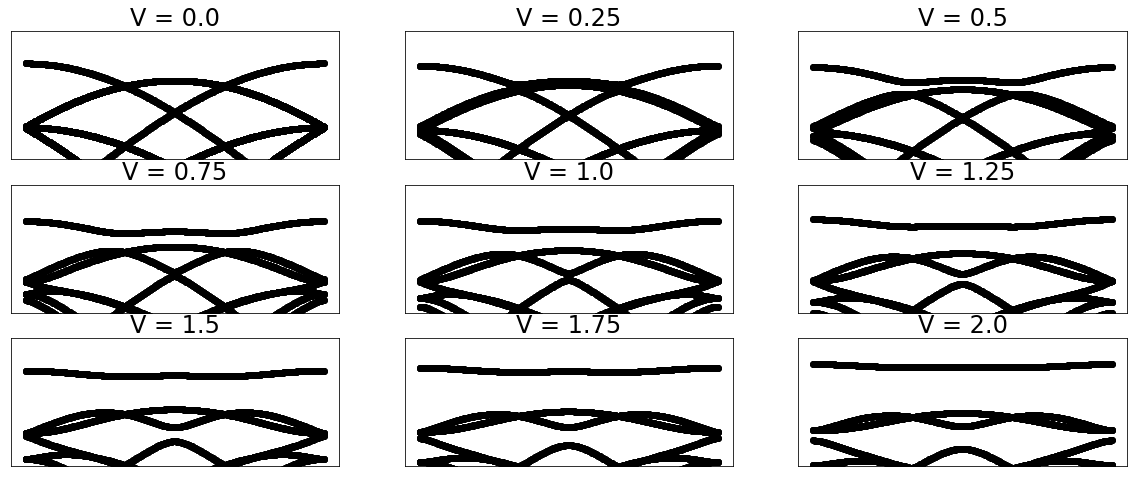

In [10]:
Nv = 9 ; Vs = np.linspace(0.,2.0,Nv) # potential strengths
N = 6 # size of the supercell
ii = 1 # counter for the subplots
for V in Vs:
    g = geometry.triangular_lattice() # generate a chain
    g = g.get_supercell((N,N)) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    fpot = potentials.commensurate_potential(g,minmax=[-V,V])
    h.add_onsite(fpot) # just a cosine potential
    plt.subplot(Nv//3,3,ii); ii += 1 
    (k,e) = h.get_bands() # compute band structure
    plt.title("V = "+str(np.round(V,2))) # set the title
    plt.scatter(k,e,c="black") ; plt.yticks([]) ; plt.xticks([]) ; plt.ylim([3,7]) # plot

### Exercise
- Discuss how the critical value for obtaining a flat band depends on the size of the supercell